In [82]:
print("      ")

In [7]:
import tensorflow as tf 
print(tf.__version__)

from tensorflow import keras
from keras import layers
from keras.layers import Embedding
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

2.10.0


vocabulary size is 1000 <br>
embedding shape is 64 cordinates

In [6]:
embedding_layer = Embedding(1000, 64)
embedding_layer

In [8]:
#Instantiate embedding layer

model = Sequential()
model.add(Embedding(10000, 8, input_length=20))
model.add(Flatten())
model.add(Dense(units=1, activation='sigmoid'))
model.summary()
          

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 8)             80000     
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


Import the IMDB pre-processed(encoded) data set from keras data util

This is a dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a list of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".

<b>num_words</b>	integer or None. Words are ranked by how often they occur (in the training set) and only the num_words most frequent words are kept. Any less frequent word will appear as oov_char value in the sequence data. If None, all words are kept. Defaults to None, so all words are kept.

<br>
<b>skip_top</b>	skip the top N most frequently occurring words (which may not be informative). These words will appear as oov_char value in the dataset. Defaults to 0, so no words are skipped.

In [9]:
from keras.datasets import imdb
from keras import preprocessing


max_features = 10000     
max_length   = 30

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features, skip_top=25)
print(f"Shape of train -> {X_train.shape}, {y_train.shape}")
print(f"Shape of train -> {X_test.shape}, {y_test.shape}")

17464789/17464789 [==============================] - 58s 3us/step
Shape of train -> (25000,), (25000,)
Shape of train -> (25000,), (25000,)


In [16]:
print(f"Length of Train - first sentence {len(X_train[0])}")
print(f"Length of Train - Second sentence {len(X_train[1])}")

print(f"Length of Test - first sentence {len(X_test[0])}")
print(f"Length of Test - Second sentence {len(X_test[1])}")

Length of Train - first sentence 218
Length of Train - Second sentence 189
Length of Test - first sentence 68
Length of Test - Second sentence 260


In [30]:
import numpy as np
np.mean([len(rec) for rec in X_train])

238.71364

Avergae length of number of words in a sentence in 238

In [31]:
#Update the max-length
max_length   = 100

Padding has to be done to make the sentence length consistent

In [33]:
X_train = keras.utils.pad_sequences(X_train, maxlen=max_length)
X_test  = keras.utils.pad_sequences(X_test, maxlen=max_length)

print(f"shape of X_train {X_train.shape}")
print(f"shape of X_test {X_test.shape}")

shape of X_train (25000, 100)
shape of X_test (25000, 100)


In [35]:
X_train[0]

array([1415,   33,    2,    2,    2,  215,   28,   77,   52,    2,    2,
        407,    2,   82,    2,    2,    2,  107,  117, 5952,    2,  256,
          2,    2,    2, 3766,    2,  723,   36,   71,   43,  530,  476,
         26,  400,  317,   46,    2,    2,    2, 1029,    2,  104,   88,
          2,  381,    2,  297,   98,   32, 2071,   56,   26,  141,    2,
        194, 7486,    2,    2,  226,    2,    2,  134,  476,   26,  480,
          2,  144,   30, 5535,    2,   51,   36,   28,  224,   92,   25,
        104,    2,  226,   65,    2,   38, 1334,   88,    2,    2,  283,
          2,    2, 4472,  113,  103,   32,    2,    2, 5345,    2,  178,
         32])

In [54]:
X_train.shape[1]

100

In [55]:
model = Sequential()
model.add(Dense(units=X_train.shape[1], activation='relu'))
model.add(Embedding(input_dim=max_features, output_dim=64, input_length=max_length))
model.add(Flatten())
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
#model.summary()

model.compile(metrics=['accuracy'], loss='binary_crossentropy', optimizer='adam')


model.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=1, epochs=1)

 37/782 [>.............................] - ETA: 5s - loss: 0.6965 - accuracy: 0.4932

InvalidArgumentError: Graph execution error:

Detected at node 'sequential_13/embedding_15/embedding_lookup' defined at (most recent call last):
    File "e:\TMLC\RTSA\tmlc_env\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "e:\TMLC\RTSA\tmlc_env\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "e:\TMLC\RTSA\tmlc_env\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "e:\TMLC\RTSA\tmlc_env\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "e:\TMLC\RTSA\tmlc_env\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "e:\TMLC\RTSA\tmlc_env\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "e:\TMLC\RTSA\tmlc_env\lib\asyncio\base_events.py", line 570, in run_forever
      self._run_once()
    File "e:\TMLC\RTSA\tmlc_env\lib\asyncio\base_events.py", line 1859, in _run_once
      handle._run()
    File "e:\TMLC\RTSA\tmlc_env\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "e:\TMLC\RTSA\tmlc_env\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "e:\TMLC\RTSA\tmlc_env\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "e:\TMLC\RTSA\tmlc_env\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "e:\TMLC\RTSA\tmlc_env\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "e:\TMLC\RTSA\tmlc_env\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "e:\TMLC\RTSA\tmlc_env\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "e:\TMLC\RTSA\tmlc_env\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "e:\TMLC\RTSA\tmlc_env\lib\site-packages\IPython\core\interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "e:\TMLC\RTSA\tmlc_env\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "e:\TMLC\RTSA\tmlc_env\lib\site-packages\IPython\core\interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "e:\TMLC\RTSA\tmlc_env\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "e:\TMLC\RTSA\tmlc_env\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\SAIRAM\AppData\Local\Temp\ipykernel_29580\4267067478.py", line 12, in <cell line: 12>
      model.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=1, epochs=1)
    File "e:\TMLC\RTSA\tmlc_env\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "e:\TMLC\RTSA\tmlc_env\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "e:\TMLC\RTSA\tmlc_env\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "e:\TMLC\RTSA\tmlc_env\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "e:\TMLC\RTSA\tmlc_env\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "e:\TMLC\RTSA\tmlc_env\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "e:\TMLC\RTSA\tmlc_env\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "e:\TMLC\RTSA\tmlc_env\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "e:\TMLC\RTSA\tmlc_env\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "e:\TMLC\RTSA\tmlc_env\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "e:\TMLC\RTSA\tmlc_env\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "e:\TMLC\RTSA\tmlc_env\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "e:\TMLC\RTSA\tmlc_env\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "e:\TMLC\RTSA\tmlc_env\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "e:\TMLC\RTSA\tmlc_env\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "e:\TMLC\RTSA\tmlc_env\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "e:\TMLC\RTSA\tmlc_env\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "e:\TMLC\RTSA\tmlc_env\lib\site-packages\keras\layers\core\embedding.py", line 208, in call
      out = tf.nn.embedding_lookup(self.embeddings, inputs)
Node: 'sequential_13/embedding_15/embedding_lookup'
indices[3,61] = 10149 is not in [0, 10000)
	 [[{{node sequential_13/embedding_15/embedding_lookup}}]] [Op:__inference_train_function_110785]

In [51]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 25000)             2525000   
                                                                 
 embedding_14 (Embedding)    (None, 25000, 64)         640000    
                                                                 
 flatten_6 (Flatten)         (None, 1600000)           0         
                                                                 
 dense_31 (Dense)            (None, 8)                 12800008  
                                                                 
 dense_32 (Dense)            (None, 1)                 9         
                                                                 
Total params: 15,965,017
Trainable params: 15,965,017
Non-trainable params: 0
_________________________________________________________________


Reference
https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

In [59]:
model = Sequential()
#model.add(Dense(units=X_train.shape[0], activation='relu'))
embed_layer = Embedding(input_dim=max_features, output_dim=64, input_length=max_length)
model.add(embed_layer)
model.add(Flatten())
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
#model.summary()

model.compile(metrics=['accuracy'], loss='binary_crossentropy', optimizer='adam')


model.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=1, epochs=5)

Epoch 1/5
782/782 [==============================] - 7s 8ms/step - loss: 0.4493 - accuracy: 0.7706 - val_loss: 0.3398 - val_accuracy: 0.8486
Epoch 2/5
782/782 [==============================] - 8s 10ms/step - loss: 0.1538 - accuracy: 0.9481 - val_loss: 0.3965 - val_accuracy: 0.8363
Epoch 3/5
782/782 [==============================] - 8s 10ms/step - loss: 0.0187 - accuracy: 0.9971 - val_loss: 0.4717 - val_accuracy: 0.8374
Epoch 4/5
782/782 [==============================] - 7s 9ms/step - loss: 0.0025 - accuracy: 0.9998 - val_loss: 0.5308 - val_accuracy: 0.8386
Epoch 5/5
782/782 [==============================] - 7s 9ms/step - loss: 6.2324e-04 - accuracy: 1.0000 - val_loss: 0.5706 - val_accuracy: 0.8405


<b> From above experiment I see that no need to define the input layer separately when we are using the embedding layer

In [60]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 100, 64)           640000    
                                                                 
 flatten_8 (Flatten)         (None, 6400)              0         
                                                                 
 dense_36 (Dense)            (None, 8)                 51208     
                                                                 
 dense_37 (Dense)            (None, 1)                 9         
                                                                 
Total params: 691,217
Trainable params: 691,217
Non-trainable params: 0
_________________________________________________________________


In [61]:
print(embed_layer.get_weights()[0].shape)

(10000, 64)


In [62]:
embed_layer.get_weights()[0]

array([[ 0.03327947,  0.02409819,  0.01100009, ...,  0.01185487,
         0.03283239,  0.00114426],
       [-0.00450393,  0.02118668, -0.02868805, ...,  0.01667534,
         0.03819578,  0.00327389],
       [ 0.01943983, -0.00630527,  0.02190512, ...,  0.05302305,
         0.0381089 ,  0.00637708],
       ...,
       [ 0.03519193, -0.01527028, -0.00960345, ..., -0.02612275,
        -0.06600567,  0.04527127],
       [ 0.11945268, -0.00486996, -0.09293883, ...,  0.05066604,
         0.05876432, -0.10050289],
       [-0.06494501, -0.01105213,  0.07039624, ...,  0.13141894,
         0.01193117,  0.08040785]], dtype=float32)

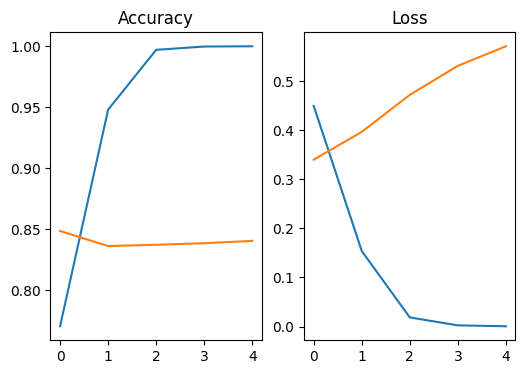

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
plt.plot(np.arange(5),model.history.history['accuracy'], label='accuracy')
plt.plot(np.arange(5),model.history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
#plt.show()

plt.subplot(1,2,2)
plt.plot(np.arange(5),model.history.history['loss'], label='loss')
plt.plot(np.arange(5),model.history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.show()